# Link dataset:
[Francisco Building Permits](https://www.kaggle.com/datasets/aparnashastry/building-permit-applications-data)

In [ ]:
from google.colab import files
files.upload()


Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"davidandreynugroho","key":"ae378ea2d8627f541e29cce578d5f067"}'}

In [ ]:
import os

# Membuat folder .kaggle
os.makedirs('/root/.kaggle', exist_ok=True)

# Memindahkan file kaggle.json ke folder .kaggle
!mv kaggle.json /root/.kaggle/

# Mengatur izin untuk file kaggle.json
!chmod 600 /root/.kaggle/kaggle.json

In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("aparnashastry/building-permit-applications-data")

print("Path to dataset files:", path)

100%|██████████| 18.0M/18.0M [00:00<00:00, 107MB/s] 

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/aparnashastry/building-permit-applications-data/versions/1


In [ ]:
# Import library yang diperlukan
import pandas as pd
import numpy as np

# Memuat dataset CSV
df = pd.read_csv(path + "/Building_Permits.csv")


# Tampilkan informasi umum dataset
print("Dataset Info:")
df.info()

<ipython-input-5-7e161e0edb73>:6: DtypeWarning: Columns (22,32) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(path + "/Building_Permits.csv")


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 198900 entries, 0 to 198899
Data columns (total 43 columns):
 #   Column                                  Non-Null Count   Dtype  
---  ------                                  --------------   -----  
 0   Permit Number                           198900 non-null  object 
 1   Permit Type                             198900 non-null  int64  
 2   Permit Type Definition                  198900 non-null  object 
 3   Permit Creation Date                    198900 non-null  object 
 4   Block                                   198900 non-null  object 
 5   Lot                                     198900 non-null  object 
 6   Street Number                           198900 non-null  int64  
 7   Street Number Suffix                    2216 non-null    object 
 8   Street Name                             198900 non-null  object 
 9   Street Suffix                           196132 non-null  object 
 10  Unit                          

In [ ]:
# Persentase missing values untuk setiap kolom
missing_percentage = df.isnull().sum() / len(df) * 100
display(missing_percentage[missing_percentage > 0])

,0
Street Number Suffix,98.885872
Street Suffix,1.391654
Unit,85.178984
Unit Suffix,99.014077
Description,0.145802
Issued Date,7.511312
Completed Date,51.135747
First Construction Document Date,7.514329
Structural Notification,96.519859
Number of Existing Stories,21.510307


In [ ]:
df['Estimated Cost'].fillna(df['Estimated Cost'].mean(), inplace=True)
df['Number of Existing Stories'].fillna(df['Number of Existing Stories'].median(), inplace=True)
df['Description'].fillna('No Description', inplace=True)

df['Number of Proposed Stories'].fillna(df['Number of Proposed Stories'].median(), inplace=True)
df['Revised Cost'].fillna(df['Revised Cost'].mean(), inplace=True)
df['Existing Use'].fillna(df['Existing Use'].mode()[0], inplace=True)
df['Existing Units'].fillna(df['Existing Units'].median(), inplace=True)
df['Proposed Units'].fillna(df['Proposed Units'].median(), inplace=True)
df['Plansets'].fillna(df['Plansets'].median(), inplace=True)
df['Existing Construction Type'].fillna(df['Existing Construction Type'].mode()[0], inplace=True)
df['Proposed Construction Type'].fillna(df['Proposed Construction Type'].mode()[0], inplace=True)
df['Supervisor District'].fillna(df['Supervisor District'].median(), inplace=True)

df['Permit Expiration Date'].fillna(df['Permit Expiration Date'].mode()[0], inplace=True)
df['Issued Date'].fillna(df['Issued Date'].mode()[0], inplace=True) #
df['First Construction Document Date'].fillna(df['First Construction Document Date'].mode()[0], inplace=True)
df['Existing Construction Type Description'].fillna(df['Existing Construction Type Description'].mode()[0], inplace=True)
df['Proposed Construction Type Description'].fillna(df['Proposed Construction Type Description'].mode()[0], inplace=True)


df.dropna(subset=['Street Suffix'], inplace=True)
df.dropna(subset=['Neighborhoods - Analysis Boundaries'], inplace=True)
df.dropna(subset=['Proposed Use'], inplace=True)
df.dropna(subset=['Zipcode'], inplace=True)

df.drop(columns=['Street Number Suffix', 'Unit', 'Completed Date', 'Voluntary Soft-Story Retrofit', 'TIDF Compliance', 'Unit Suffix',
                'Structural Notification', 'Site Permit', 'Fire Only Permit'
                ], inplace=True)


<ipython-input-6-3d4e8e825b90>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Estimated Cost'].fillna(df['Estimated Cost'].mean(), inplace=True)
<ipython-input-6-3d4e8e825b90>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inpl

In [ ]:
df['Permit Number'] = pd.to_numeric(df['Permit Number'], errors='coerce')
# Convert date columns
date_columns = ['Permit Creation Date', 'Current Status Date', 'Filed Date', 'Issued Date', 'First Construction Document Date']
for col in date_columns:
    df[col] = pd.to_datetime(df[col], errors='coerce')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 153202 entries, 2 to 198885
Data columns (total 34 columns):
 #   Column                                  Non-Null Count   Dtype         
---  ------                                  --------------   -----         
 0   Permit Number                           153202 non-null  int64         
 1   Permit Type                             153202 non-null  int64         
 2   Permit Type Definition                  153202 non-null  object        
 3   Permit Creation Date                    153202 non-null  datetime64[ns]
 4   Block                                   153202 non-null  object        
 5   Lot                                     153202 non-null  object        
 6   Street Number                           153202 non-null  int64         
 7   Street Name                             153202 non-null  object        
 8   Street Suffix                           153202 non-null  object        
 9   Description                             15

In [ ]:
# Hitung jumlah missing values untuk setiap kolom
missing_values_count = df.isnull().sum()

# Menampilkan hasil
display(missing_values_count)


,0
Permit Number,0
Permit Type,0
Permit Type Definition,0
Permit Creation Date,0
Block,0
Lot,0
Street Number,0
Street Name,0
Street Suffix,0
Description,0


In [ ]:
df.head(10)

,Permit Number,Permit Type,Permit Type Definition,Permit Creation Date,Block,Lot,Street Number,Street Name,Street Suffix,Description,...,Plansets,Existing Construction Type,Existing Construction Type Description,Proposed Construction Type,Proposed Construction Type Description,Supervisor District,Neighborhoods - Analysis Boundaries,Zipcode,Location,Record ID
2,201605278609,3,additions alterations or repairs,2016-05-27,0595,203,1647,Pacific,Av,installation of separating wall,...,2.0,1.0,constr type 1,1.0,constr type 1,3.0,Russian Hill,94109.0,"(37.7946573324287, -122.42232562979227)",1424856504716
3,201611072166,8,otc alterations permit,2016-11-07,0156,011,1230,Pacific,Av,repair dryrot & stucco at front of bldg.,...,2.0,5.0,wood frame (5),5.0,wood frame (5),3.0,Nob Hill,94109.0,"(37.79595867909168, -122.41557405519474)",1443574295566
5,201706149344,8,otc alterations permit,2017-06-14,4105,009,800,Indiana,St,evac maps,...,2.0,1.0,constr type 1,1.0,constr type 1,10.0,Potrero Hill,94107.0,"(37.75922331346539, -122.39170402628598)",1466911170855
6,201706300814,8,otc alterations permit,2017-06-30,1739,020,1291,11th,Av,re-roofing,...,0.0,5.0,wood frame (5),5.0,wood frame (5),5.0,Inner Sunset,94122.0,"(37.764145640138565, -122.46875112470363)",1468970403692
13,201707252846,8,otc alterations permit,2017-07-25,6589,002R,681,27th,St,remove and replace landscape wall,...,2.0,5.0,wood frame (5),5.0,wood frame (5),8.0,Noe Valley,94131.0,"(37.7462205625642, -122.4353484860549)",1471799208305
18,201707283165,8,otc alterations permit,2017-07-28,0472,042,1307,Bay,St,soft story ordinance sf building code chptr 34...,...,2.0,5.0,wood frame (5),5.0,wood frame (5),2.0,Marina,94123.0,"(37.8035183252307, -122.42863180996076)",1472277302360
21,201708013476,8,otc alterations permit,2017-08-01,6529,010,3410,26th,St,repair fire damage to comply with nov #201551241.,...,2.0,5.0,wood frame (5),5.0,wood frame (5),9.0,Mission,94110.0,"(37.74914175355125, -122.41849211166853)",1472727381751
22,201708013544,3,additions alterations or repairs,2017-08-01,0074,043,2150,Taylor,St,"soft story retrofit per sfebc chapter 4d, asce...",...,2.0,5.0,wood frame (5),5.0,wood frame (5),3.0,Russian Hill,94133.0,"(37.802405951667645, -122.41446286561653)",147281357792
24,201708084249,8,otc alterations permit,2017-08-08,0542,039,1,Charlton,Ct,re-roofing,...,0.0,5.0,wood frame (5),5.0,wood frame (5),2.0,Marina,94123.0,"(37.79739093461306, -122.43127133823367)",1473796372030
25,201708165014,8,otc alterations permit,2017-08-16,1824,006,1435,29th,Av,re-roofing,...,0.0,5.0,wood frame (5),5.0,wood frame (5),4.0,Sunset/Parkside,94122.0,"(37.76052279949518, -122.4879889739165)",1474841115935


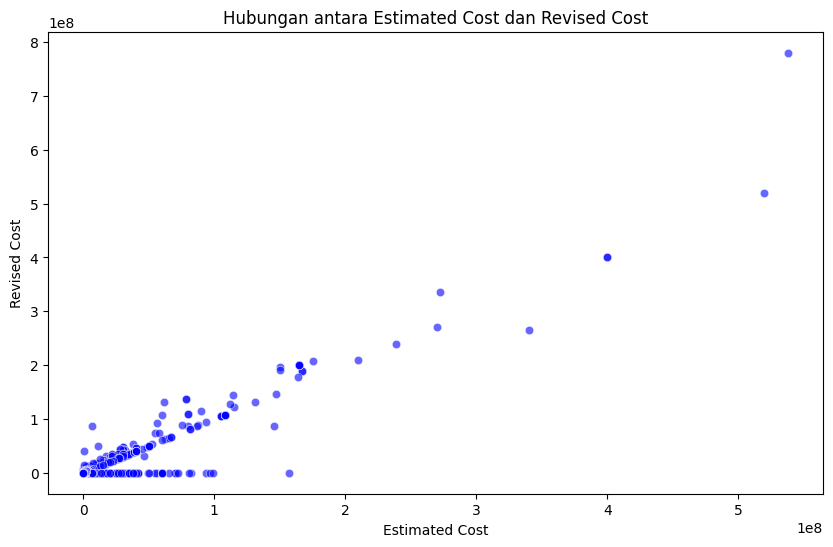

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# Scatter plot Estimated Cost vs Revised Cost
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Estimated Cost', y='Revised Cost', data=df, alpha=0.6, color='blue')
plt.title('Hubungan antara Estimated Cost dan Revised Cost')
plt.xlabel('Estimated Cost')
plt.ylabel('Revised Cost')
plt.show()


<ipython-input-8-e84df929b5bd>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Current Status', data=df, order=df['Current Status'].value_counts().index, palette='viridis')


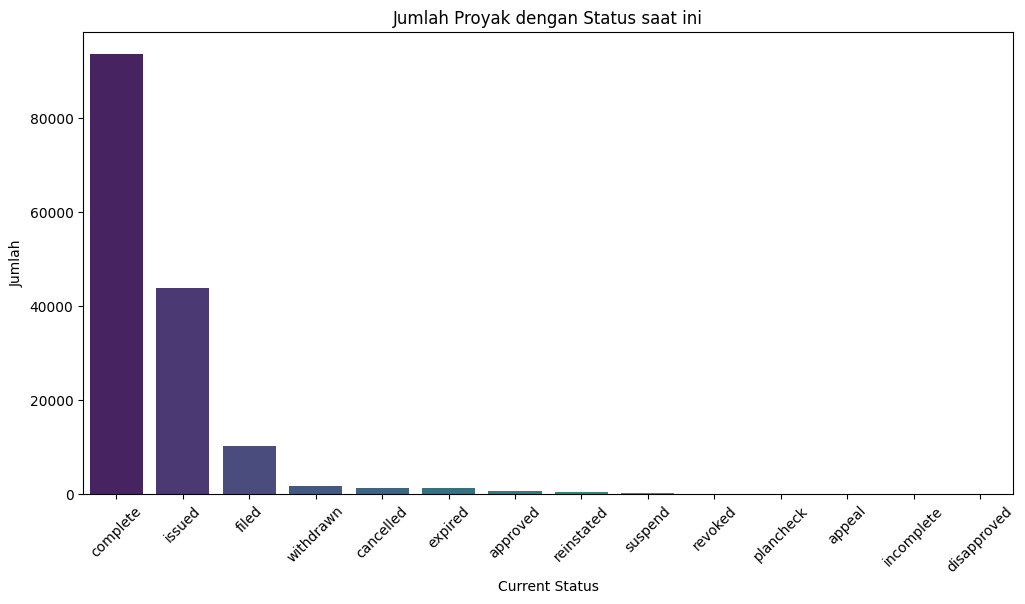

,count
count,14.000000
mean,10943.000000
std,26464.301415
min,1.000000
25%,23.500000
50%,559.000000
75%,1560.250000
max,93540.000000


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
# Visualisasi Current Status

plt.figure(figsize=(12, 6))
sns.countplot(x='Current Status', data=df, order=df['Current Status'].value_counts().index, palette='viridis')
plt.title('Jumlah Proyak dengan Status saat ini')
plt.xlabel('Current Status')
plt.ylabel('Jumlah')
plt.xticks(rotation=45)
plt.show()
df['Current Status'].value_counts().describe()

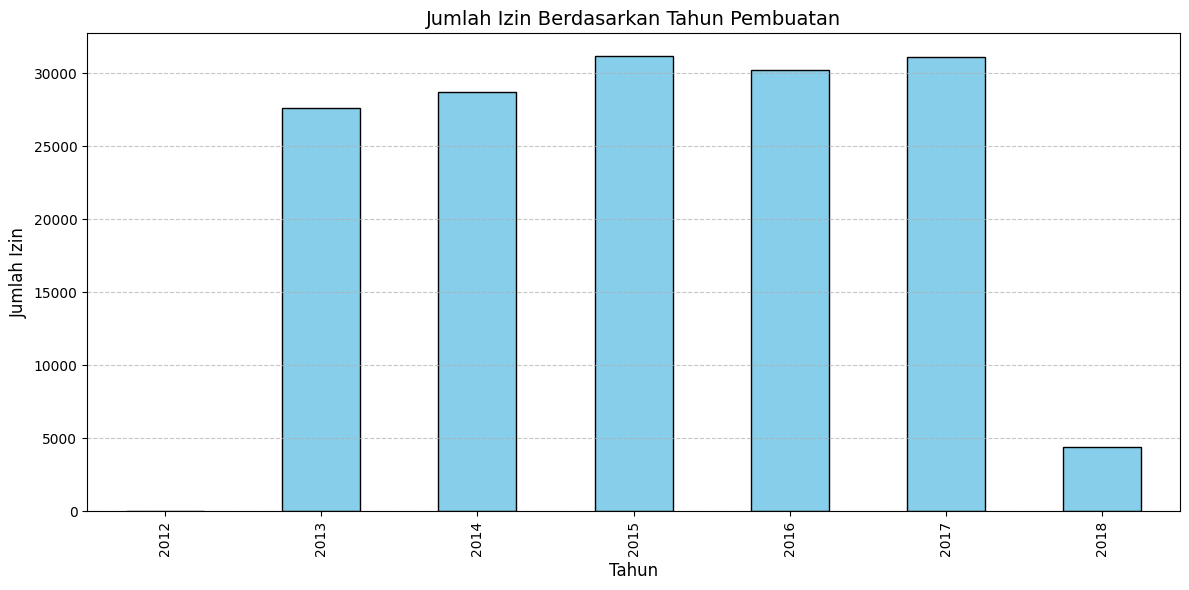

,count
count,7.000000
mean,21886.000000
std,13564.167022
min,22.000000
25%,15991.500000
50%,28726.000000
75%,30655.500000
max,31160.000000


In [ ]:

# Plot the histogram for 'Permit Creation Date'
plt.figure(figsize=(12, 6))
df['Permit Creation Date'].dt.year.value_counts().sort_index().plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Jumlah Izin Berdasarkan Tahun Pembuatan', fontsize=14)
plt.xlabel('Tahun', fontsize=12)
plt.ylabel('Jumlah Izin', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()
df['Permit Creation Date'].dt.year.value_counts().describe()

<ipython-input-14-bc26908c7410>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Neighborhoods - Analysis Boundaries',


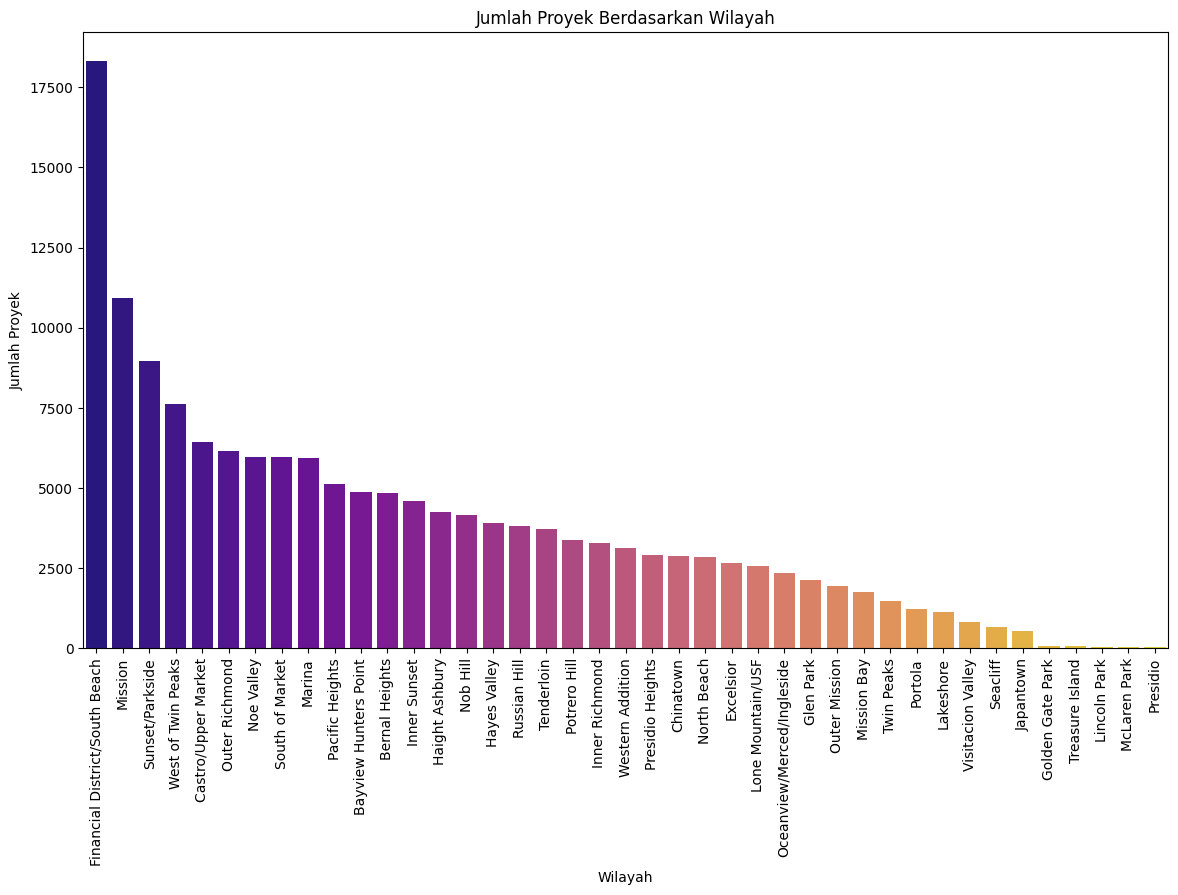

,count
count,41.000000
mean,3736.634146
std,3434.917363
min,36.000000
25%,1476.000000
50%,3111.000000
75%,4865.000000
max,18312.000000


In [ ]:
# Jumlah proyek per wilayah
project_count_by_neighborhood = df['Neighborhoods - Analysis Boundaries'].value_counts()

# Visualisasi jumlah proyek per wilayah
plt.figure(figsize=(14, 8))
sns.countplot(x='Neighborhoods - Analysis Boundaries',
              data=df,
              order=df['Neighborhoods - Analysis Boundaries'].value_counts().index,
              palette='plasma')
plt.title('Jumlah Proyek Berdasarkan Wilayah')
plt.xlabel('Wilayah')
plt.ylabel('Jumlah Proyek')
plt.xticks(rotation=90)
plt.show()
df['Neighborhoods - Analysis Boundaries'].value_counts().describe()

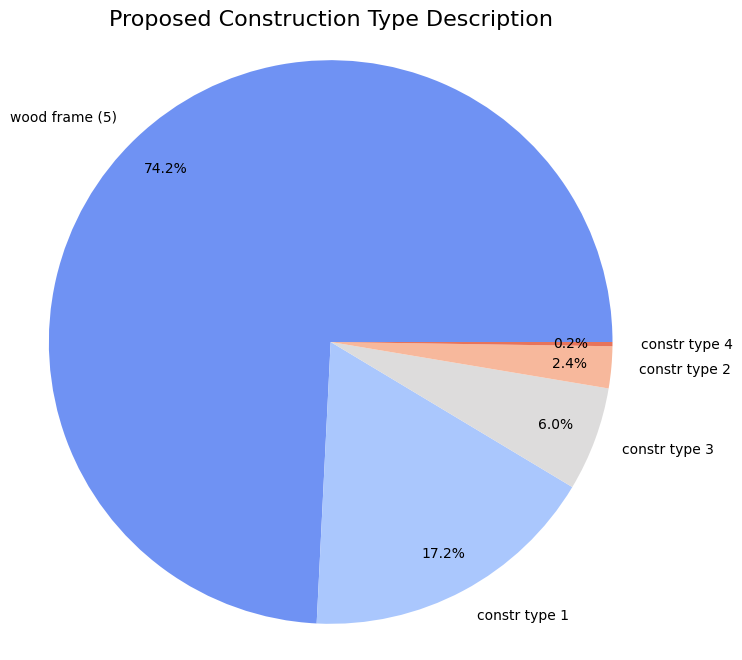

In [ ]:
# Menghitung frekuensi setiap kategori dalam Proposed Construction Type Description
proposed_construction_type_counts = df['Proposed Construction Type Description'].value_counts()

# Membuat Pie Chart
plt.figure(figsize=(8, 8))
plt.pie(proposed_construction_type_counts,
        labels=proposed_construction_type_counts.index,
        autopct='%1.1f%%',
        colors=sns.color_palette('coolwarm', len(proposed_construction_type_counts)),
        labeldistance=1.1,
        pctdistance=0.85)

plt.title('Proposed Construction Type Description', fontsize=16)
plt.axis('equal')  # Menjaga agar pie chart berbentuk lingkaran
plt.show()


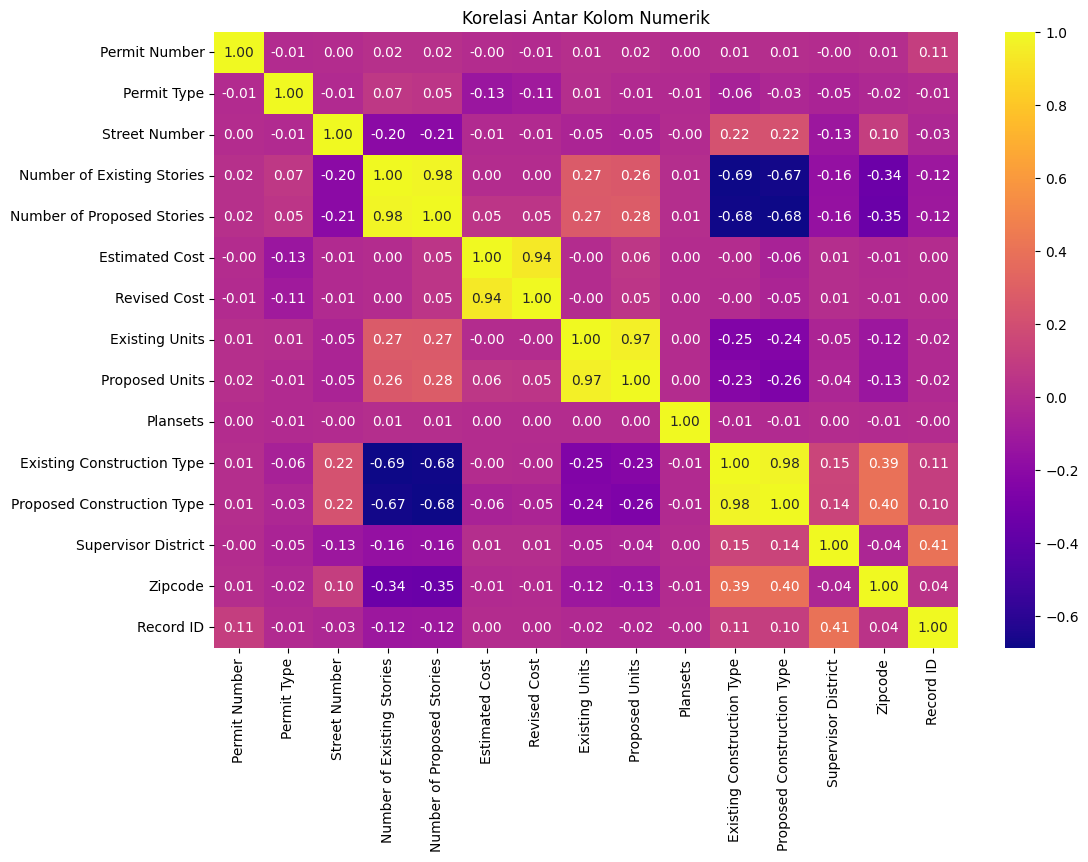

In [ ]:
# Visualisasi korelasi antar kolom numerik
numerical_df = df.select_dtypes(include=['number'])

corr_matrix = numerical_df.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='plasma', fmt=".2f")
plt.title('Korelasi Antar Kolom Numerik')
plt.show()

In [ ]:
from pyspark.sql import SparkSession

# Initialize a Spark session
spark = SparkSession.builder.appName("BuildingPermitML").getOrCreate()

spark_df = spark.createDataFrame(df)

# Display the schema of the Spark DataFrame
spark_df.printSchema()

# Display the first few rows of the Spark DataFrame
spark_df.show(5)

root
 |-- Permit Number: long (nullable = true)
 |-- Permit Type: long (nullable = true)
 |-- Permit Type Definition: string (nullable = true)
 |-- Permit Creation Date: timestamp (nullable = true)
 |-- Block: string (nullable = true)
 |-- Lot: string (nullable = true)
 |-- Street Number: long (nullable = true)
 |-- Street Name: string (nullable = true)
 |-- Street Suffix: string (nullable = true)
 |-- Description: string (nullable = true)
 |-- Current Status: string (nullable = true)
 |-- Current Status Date: timestamp (nullable = true)
 |-- Filed Date: timestamp (nullable = true)
 |-- Issued Date: timestamp (nullable = true)
 |-- First Construction Document Date: timestamp (nullable = true)
 |-- Number of Existing Stories: double (nullable = true)
 |-- Number of Proposed Stories: double (nullable = true)
 |-- Permit Expiration Date: string (nullable = true)
 |-- Estimated Cost: double (nullable = true)
 |-- Revised Cost: double (nullable = true)
 |-- Existing Use: string (nullable = 

# Regression (Linear Regression)

In [ ]:
from pyspark.sql import SparkSession
from pyspark.ml.feature import VectorAssembler, StringIndexer
from pyspark.ml.regression import LinearRegression  # Menggunakan LinearRegression
from pyspark.ml import Pipeline
from pyspark.ml.evaluation import RegressionEvaluator  # Menggunakan evaluator regresi
from pyspark.sql.functions import col

# Inisialisasi Spark Session

# Memilih kolom yang relevan untuk model
columns_to_use = [
    'Number of Existing Stories', 'Number of Proposed Stories',
    'Estimated Cost', 'Revised Cost', 'Supervisor District'
]

# Menggunakan StringIndexer untuk mengonversi kolom target (misalnya kolom harga atau cost)
indexer = StringIndexer(inputCol="Permit Type", outputCol="label")

# Menggunakan VectorAssembler untuk menggabungkan fitur menjadi satu kolom 'features'
assembler = VectorAssembler(
    inputCols=columns_to_use,
    outputCol="features"
)

# Inisialisasi Linear Regression
lr = LinearRegression(featuresCol="features", labelCol="label")

# Membuat pipeline untuk menggabungkan semua langkah
pipeline = Pipeline(stages=[indexer, assembler, lr])

# Split data menjadi data pelatihan dan pengujian (80% train, 20% test)
train_data, test_data = spark_df.randomSplit([0.8, 0.2], seed=42)

# Fit pipeline pada data pelatihan
model = pipeline.fit(train_data)

# Prediksi pada data pengujian
predictions = model.transform(test_data)

# Evaluasi model menggunakan RegressionEvaluator
evaluator = RegressionEvaluator(labelCol="label", predictionCol="prediction", metricName="rmse")
rmse = evaluator.evaluate(predictions)

print(f"Root Mean Squared Error (RMSE) for Linear Regression: {rmse}")

# Tampilkan koefisien dan intercept dari model Linear Regression
lr_model = model.stages[2]  # Model Linear Regression
print(f"Coefficients: {lr_model.coefficients}")  # Koefisien regresi
print(f"Intercept: {lr_model.intercept}")  # Intercept regresi


Root Mean Squared Error (RMSE) for Linear Regression: 0.3444558469396022
Coefficients: [-0.01661775666960228,0.01407180315535133,3.5610523830591525e-08,-1.6696955190461777e-08,0.005497118051578307]
Intercept: 0.09116861367597216


# Classification (Logistic Regression dan Random Forest Classifier)

In [ ]:
from pyspark.sql import SparkSession
from pyspark.ml.classification import LogisticRegression
from pyspark.ml.linalg import Vectors, VectorUDT
from pyspark.sql.functions import udf
from pyspark.ml.feature import VectorAssembler
from pyspark.sql.types import StructType, StructField, IntegerType, DoubleType

# Start a SparkSession
spark = SparkSession.builder.appName("LogisticRegressionExample").getOrCreate()


# Pilih beberapa kolom yang akan digunakan untuk fitur dan label
columns = ['Permit Type', 'Number of Existing Stories', 'Number of Proposed Stories', 'Estimated Cost', 'Revised Cost']
df = spark_df.select(columns)

# Gunakan VectorAssembler untuk menggabungkan fitur-fitur menjadi satu vektor fitur
assembler = VectorAssembler(
    inputCols=["Number of Existing Stories", "Number of Proposed Stories", "Estimated Cost", "Revised Cost"],
    outputCol="features"
)

# Terapkan VectorAssembler untuk membuat kolom fitur
df = assembler.transform(df)

# Train logistic regression model
lr = LogisticRegression(featuresCol='features', labelCol='Permit Type')
model = lr.fit(df)

# Get the coefficient matrix
coefficient_matrix = model.coefficientMatrix

# Print the coefficient matrix
print(f"Coefficient Matrix: {coefficient_matrix}")

# Get the intercept vector
intercept_vector = model.interceptVector

# Print the intercept vector
print(f"Intercept Vector: {intercept_vector}")


# Lakukan prediksi
predictions = model.transform(df)

# Menampilkan hasil prediksi
predictions.select("Permit Type", "features", "prediction", "probability").show(truncate=False)

Coefficient Matrix: DenseMatrix([[ 9.59826879e-03,  9.28879546e-03,  6.56568402e-10,
               7.06190365e-10],
             [-2.26153576e-01,  1.01025185e-01,  2.65970850e-07,
               5.73900668e-07],
             [ 1.23254084e-01, -2.07164114e-01,  2.09654318e-07,
               5.81184113e-07],
             [-4.67742244e-02,  5.80394286e-02,  3.79231460e-08,
               5.75515805e-07],
             [ 9.59826879e-03,  9.28879546e-03,  6.56568402e-10,
               7.06190365e-10],
             [ 9.59826879e-03,  9.28879546e-03,  6.56568402e-10,
               7.06190365e-10],
             [ 9.59826879e-03,  9.28879546e-03,  6.56568402e-10,
               7.06190365e-10],
             [ 9.59826879e-03,  9.28879546e-03,  6.56568402e-10,
               7.06190365e-10],
             [ 1.01682373e-01,  1.65552331e-03, -5.16831156e-07,
              -1.73413154e-06]])
Intercept Vector: [-4.181934200656112,2.20559952980966,3.833058813660881,6.339765815133788,-4.181934200656

In [ ]:
from pyspark.ml.classification import RandomForestClassifier
from pyspark.ml.feature import VectorAssembler, StringIndexer
from pyspark.ml.evaluation import MulticlassClassificationEvaluator
from pyspark.ml import Pipeline


# Convert 'Permit Type' to a numeric label using StringIndexer
indexer = StringIndexer(inputCol="Permit Type", outputCol="label")

# Use VectorAssembler to combine features into a single feature vector
assembler = VectorAssembler(
    inputCols=["Number of Existing Stories", "Number of Proposed Stories", "Estimated Cost", "Revised Cost"],
    outputCol="features"
)

# Initialize Random Forest Classifier
rf = RandomForestClassifier(labelCol="label", featuresCol="features")

# Create a pipeline to chain the steps
pipeline = Pipeline(stages=[indexer, assembler, rf])

# Split data into training and testing sets (80% train, 20% test)
train_data, test_data = spark_df.randomSplit([0.8, 0.2], seed=42)

# Fit the pipeline to the training data
model = pipeline.fit(train_data)

# Make predictions on the test data
predictions = model.transform(test_data)

# Evaluate the model's accuracy using MulticlassClassificationEvaluator
evaluator = MulticlassClassificationEvaluator(labelCol="label", predictionCol="prediction", metricName="accuracy")
accuracy = evaluator.evaluate(predictions)

print(f"Model Accuracy: {accuracy}")
print(f"Training Data Count: {train_data.count()}")
print(f"Test Data Count: {test_data.count()}")

rf_model = model.stages[2]  # Model RandomForestClassifier

# Menampilkan feature importances
print("Feature Importances: ", rf_model.featureImportances)

Model Accuracy: 0.9295847807031783
Training Data Count: 122399
Test Data Count: 30803
Feature Importances:  (4,[0,1,2,3],[0.07372512648474376,0.04609069790192379,0.17887130603483997,0.7013128695784924])


# Explore hyperparameter tuning using cross-validation.

In [ ]:
from pyspark.ml.tuning import CrossValidator, ParamGridBuilder
from pyspark.ml.evaluation import MulticlassClassificationEvaluator

# Definisikan parameter grid untuk tuning
paramGrid = (ParamGridBuilder()
             .addGrid(rf.numTrees, [10, 20, 30])  # Jumlah pohon
             .addGrid(rf.maxDepth, [5, 10, 15])   # Kedalaman maksimum pohon
             .build())

# Evaluator untuk cross-validation
evaluator = MulticlassClassificationEvaluator(labelCol="label", predictionCol="prediction", metricName="accuracy")

# Inisialisasi CrossValidator
crossval = CrossValidator(estimator=pipeline,
                          estimatorParamMaps=paramGrid,
                          evaluator=evaluator,
                          numFolds=5)  # 5-fold cross-validation

# Lakukan cross-validation pada data pelatihan
cvModel = crossval.fit(train_data)

# Lakukan prediksi pada data pengujian
cvPredictions = cvModel.transform(test_data)

# Evaluasi model yang di-tuning
cvAccuracy = evaluator.evaluate(cvPredictions)

# Tampilkan hasil akurasi setelah tuning hiperparameter
print(f"Accuracy after Hyperparameter Tuning: {cvAccuracy}")

rf_model2 = cvModel.bestModel.stages[2]  # Model RandomForestClassifier

# Menampilkan fitur penting (feature importances)
print("Feature Importances: ", rf_model2.featureImportances)


Accuracy after Hyperparameter Tuning: 0.9356880823296432
Feature Importances:  (4,[0,1,2,3],[0.10181630995836857,0.08765178275570482,0.17908899302528064,0.6314429142606459])


# Clustering (KMeans)

In [ ]:
from pyspark.ml.clustering import KMeans
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.evaluation import ClusteringEvaluator
from pyspark.sql import SparkSession

# Inisialisasi Spark Session
spark = SparkSession.builder.appName("KMeansClusteringExample").getOrCreate()


# Memilih fitur numerik untuk clustering
features_to_use = [
    'Number of Existing Stories',
    'Number of Proposed Stories',
    'Estimated Cost',
    'Revised Cost'
]

# Menggunakan VectorAssembler untuk menggabungkan fitur menjadi satu kolom 'features'
assembler = VectorAssembler(
    inputCols=features_to_use,
    outputCol="features"
)
df_features = assembler.transform(spark_df)

# Inisialisasi KMeans dengan jumlah kluster
kmeans = KMeans(k=3, seed=42, featuresCol="features", predictionCol="cluster")

# Latih model KMeans pada data
kmeans_model = kmeans.fit(df_features)

# Prediksi kluster untuk setiap baris
clustered_data = kmeans_model.transform(df_features)

# Evaluasi hasil clustering menggunakan Silhouette Score
evaluator = ClusteringEvaluator(featuresCol="features", predictionCol="cluster", metricName="silhouette")
silhouette_score = evaluator.evaluate(clustered_data)

print(f"Silhouette Score: {silhouette_score}")

# Menampilkan pusat kluster
centers = kmeans_model.clusterCenters()
print("Cluster Centers:")
for idx, center in enumerate(centers):
    print(f"Cluster {idx}: {center}")




Silhouette Score: 0.9990142347500063
Cluster Centers:
Cluster 0: [5.49772010e+00 5.59092810e+00 9.90690672e+04 9.43874177e+04]
Cluster 1: [3.31578947e+00 3.76842105e+01 2.53684261e+08 2.82796868e+08]
Cluster 2: [3.29245283e+00 1.11792453e+01 6.17380621e+07 5.35954198e+07]


In [ ]:
from pyspark.sql import SparkSession
from pyspark.ml.recommendation import ALS
from pyspark.sql.functions import col

# Inisialisasi Spark Session
spark = SparkSession.builder.appName("CollaborativeFiltering").getOrCreate()

# Anggap df sudah tersedia sebagai pandas DataFrame
spark_df = spark.createDataFrame(df)

# Cast kolom 'Permit Number' dan 'Permit Type' ke dalam tipe data yang sesuai
spark_df = spark_df.withColumn("Permit_Number", col("Permit Number").cast("int"))
spark_df = spark_df.withColumn("Permit_Type", col("Permit Type").cast("int"))
spark_df = spark_df.withColumn("Revised_Cost", col("Revised Cost").cast("float"))

# Menghitung jumlah NULL di setiap kolom
spark_df.select(
    col("Permit_Number").isNull().alias("Permit_Number_NULL"),
    col("Permit_Type").isNull().alias("Permit_Type_NULL"),
    col("Revised_Cost").isNull().alias("Revised_Cost_NULL")
).groupBy("Permit_Number_NULL", "Permit_Type_NULL", "Revised_Cost_NULL").count().show()

# Mengganti NULL dengan nilai default 0 jika ada
spark_df = spark_df.fillna({"Permit_Type": 0})

# Validasi ulang untuk kolom
print("Jumlah NULL setelah pengisian nilai default:")
print(spark_df.where(col("Permit_Type").isNull()).count())

# Membuat model ALS
als = ALS(userCol='Permit_Number', itemCol='Permit_Type', ratingCol='Revised_Cost', coldStartStrategy='drop')

# Fit model pada data
model_als = als.fit(spark_df)

# Memberikan rekomendasi untuk pengguna
recommendations = model_als.recommendForAllUsers(5)

# Menampilkan rekomendasi
recommendations.show(truncate=False)


+------------------+----------------+-----------------+------+
|Permit_Number_NULL|Permit_Type_NULL|Revised_Cost_NULL| count|
+------------------+----------------+-----------------+------+
|             false|           false|            false|153202|
+------------------+----------------+-----------------+------+

Jumlah NULL setelah pengisian nilai default:
0
+-------------+-------------------------------------------------------------------+
|Permit_Number|recommendations                                                    |
+-------------+-------------------------------------------------------------------+
|-562435875   |[{1, 9.1995856E7}, {2, 438016.03}, {3, 205094.31}, {8, 9599.999}]  |
|-562435874   |[{1, 4791450.5}, {2, 22813.34}, {3, 10681.997}, {8, 499.99997}]    |
|-562435870   |[{1, 1.1499482E7}, {2, 54752.004}, {3, 25636.79}, {8, 1199.9999}]  |
|-562435868   |[{1, 340544.66}, {3, 50000.004}, {8, 68.9287}, {2, -100663.71}]    |
|-562435867   |[{1, 6.7080304E7}, {2, 319386.7}, 